### Import Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Akazh\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Dataset Information
### Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Data Understanding

In [3]:
# Load datasets
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Change name for column 'y' to 'subscribed' because we know what y column it was

In [4]:
# Change name for 'y' -> 'subscribed'
df.rename(columns={'y':'subscribed'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Check dataset  structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset contains 41,188 rows and 21 columns. Each column has 41,188 non-null values, which matches the total number of rows (RangeIndex). This indicates that there are no missing values in any of the columns.

In [6]:
# Quick statistical summary of numerical features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Exploratory Data Analysis

## Univariate Analysis
Distribution of Single Variable  
It helps understand of the aspect of data such as 
- `Central Tendency` (mean,median, mode)
- `Shape of distribution` (normal, skewed, uniform)
- `Spread / dispersion` (range, variance, standard deviation, quartile)

Select Categorical features and the target features (label) that will be use for decision tree.  
The deposit column below is the target features for a yes or no subcription to a bank deposit

In [7]:
df_features = df[['job','marital','education','default','housing','loan','subscribed']]
df_features

,job,marital,education,default,housing,loan,subscribed
0,housemaid,married,basic.4y,no,no,no,no
1,services,married,high.school,unknown,no,no,no
2,services,married,high.school,no,yes,no,no
3,admin.,married,basic.6y,no,no,no,no
4,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,yes
41184,blue-collar,married,professional.course,no,no,no,no
41185,retired,married,university.degree,no,yes,no,no
41186,technician,married,professional.course,no,no,no,yes


In [8]:
# Quick check statistical summary
df_features.describe()

,job,marital,education,default,housing,loan,subscribed
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2
top,admin.,married,university.degree,no,yes,no,no
freq,10422,24928,12168,32588,21576,33950,36548


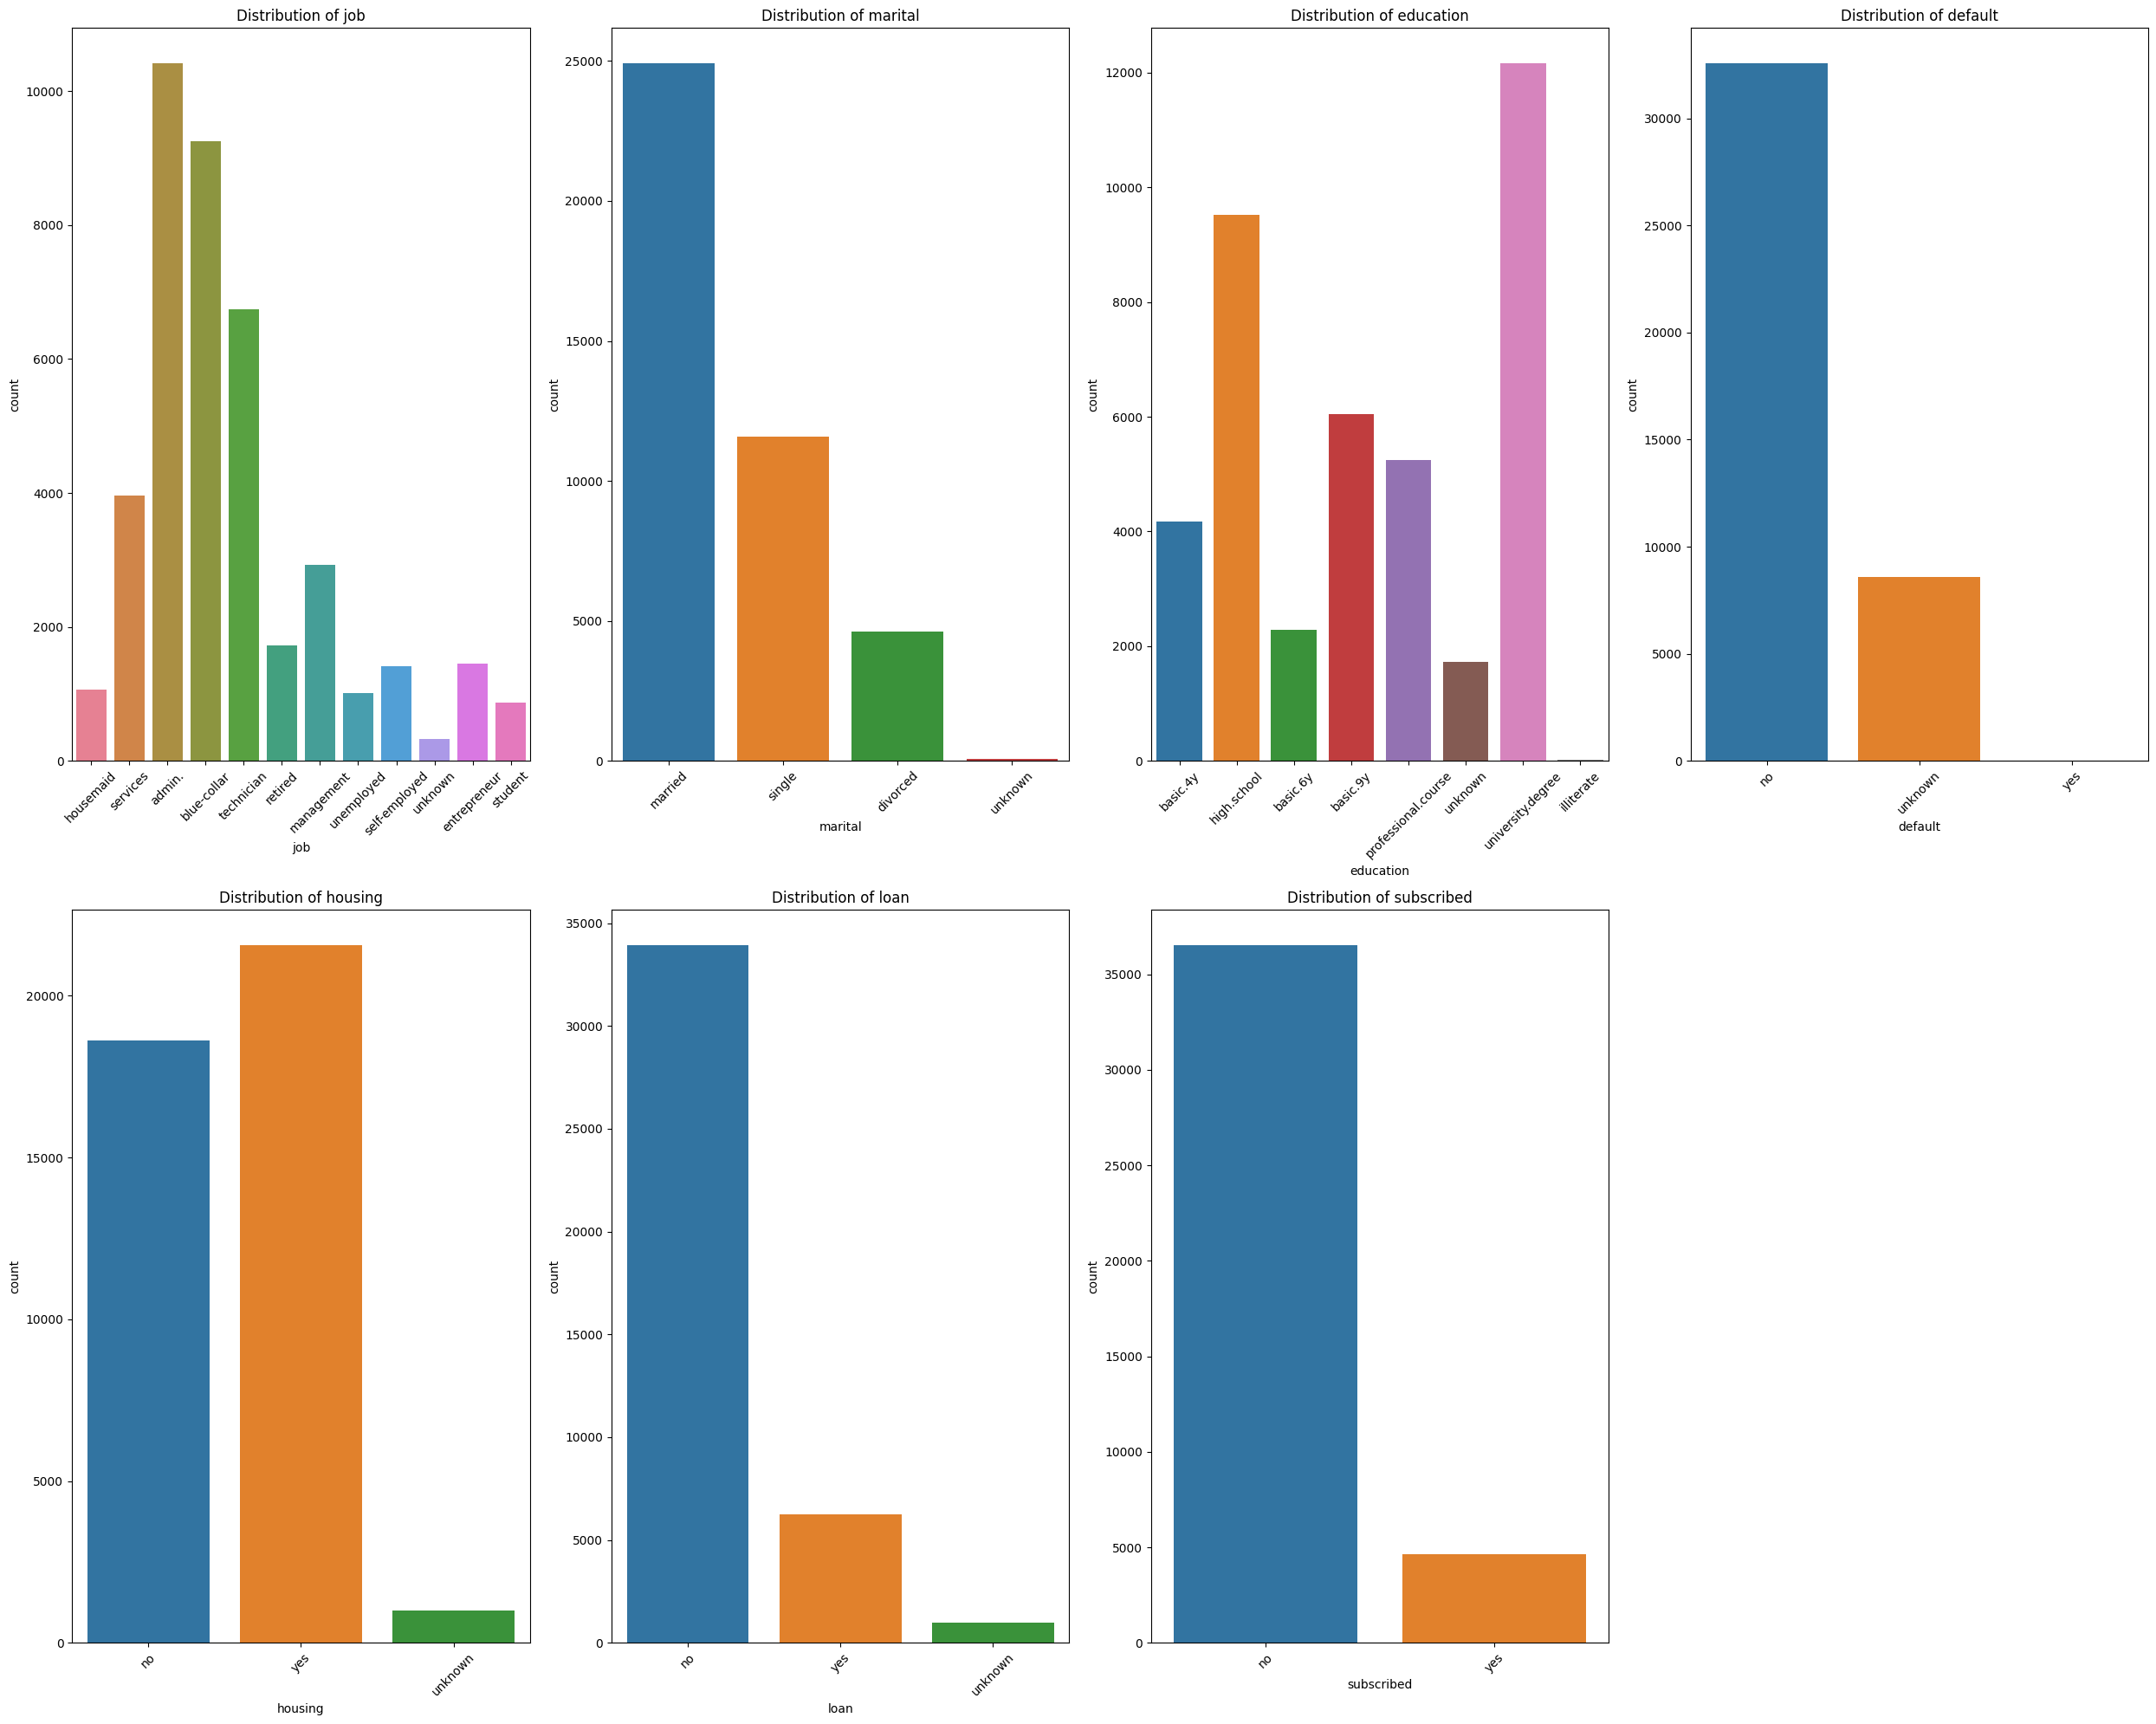

In [9]:
categorical_df = df_features.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,20))
axes = axes.flatten()

for i, col in enumerate(categorical_df):
    sns.countplot(data=df_features, x=col, ax=axes[i], hue=col)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# for col in categorical_df:
#     plt.figure(figsize=(12,6))
#     sns.countplot(x=col, data=df_features)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(f'{col}')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

## Bivariate Analysis
Relationship between two variables  
It helps to understand how one variable changes with respect to another.  

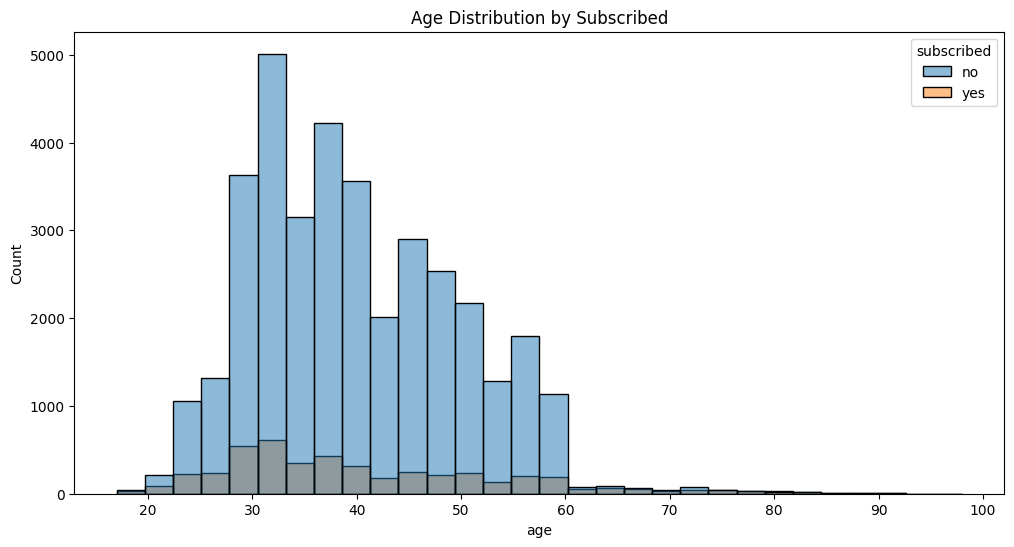

In [10]:
# Age Distribution by Subscribed

plt.figure(figsize=(12,6))
sns.histplot(x='age', hue='subscribed', bins=30, data=df)
plt.title('Age Distribution by Subscribed')
plt.show()

The chart shows that the largest number of both subscribers and non-subscribers are between 30 and 40 years old.  
While this age group represents the biggest market, there is also a smaller but significant peak in subscriptions among customers over the age of 50, suggesting they are a receptive secondary audience.

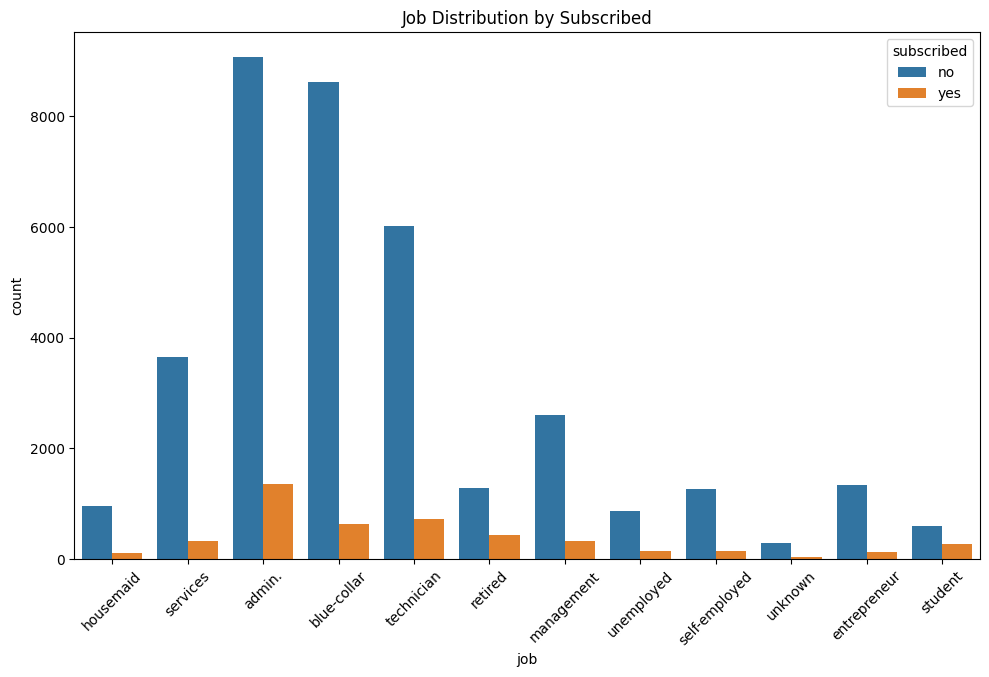

In [11]:
# Job Distribution by Subscribed
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='job', hue='subscribed')
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Job Distribution by Subscribed")
plt.show()

This chart shows us which customer groups are subscribing and which are not. We can see two main stories:
1. Our Biggest Customer Groups: Most of our customers work in `admin`, `blue-collar`, and `technician roles`. Because these groups are so large, they give us the highest number of subscribers. However, they also have the highest number of people saying "no."
2. Our Most Interested Customers: Students and Retired individuals are the most likely to subscribe. Even though there are fewer of them, a much higher percentage of them say "yes" compared to other job types.

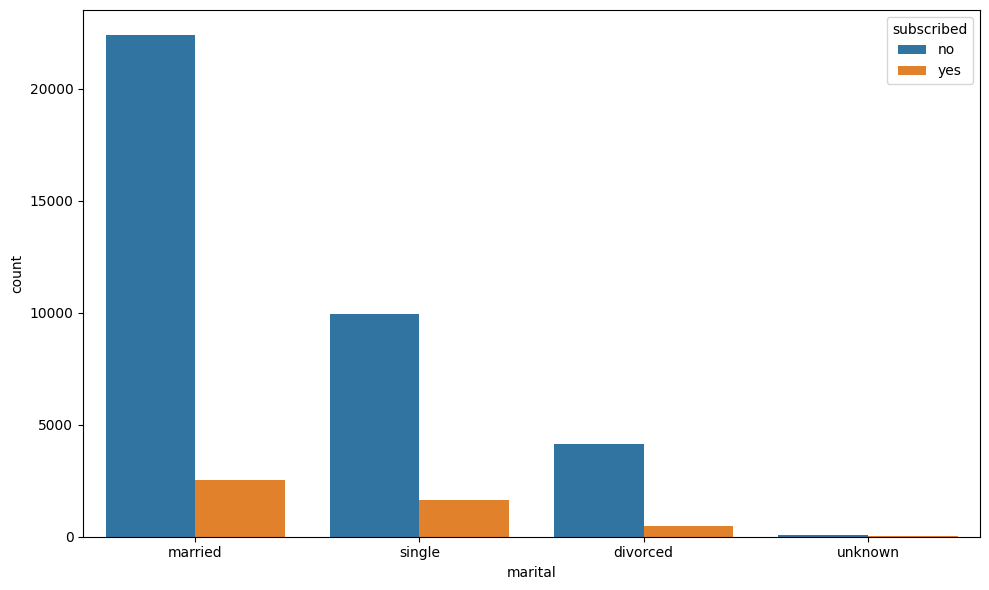

In [12]:
# Marital Status Distribution by Subscribed
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='marital', hue='subscribed')
plt.tight_layout()
plt.show()

Married Customers are the Biggest Audience: Married individuals make up the largest portion of our customers. While they bring in the highest total number of subscriptions, they are also the least likely group to say `yes`.  
Single Customers are the Most Receptive: The key insight is that single customers are significantly more likely to subscribe. Although they are a smaller group than married customers, a higher percentage of them sign up for the term deposit.


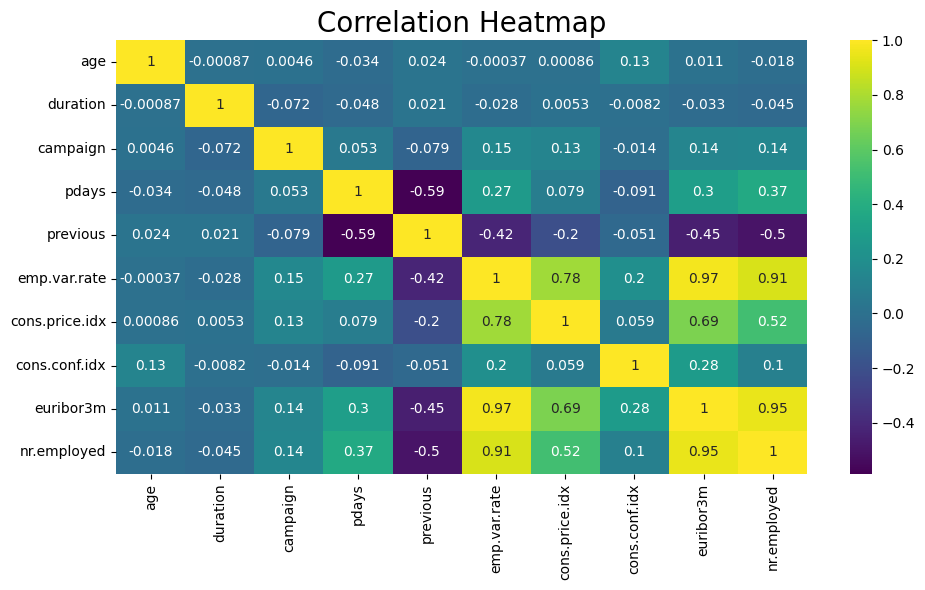

In [13]:
#Distribution of Numerical Features
numerical_df = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_df].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()



## Preprocessing